I followed this notebook: https://www.kaggle.com/code/caesarmario/loan-prediction-w-various-ml-models/notebookand and used this Dataset: https://www.kaggle.com/datasets/burak3ergun/loan-data-set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Data Analysis

In [3]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Numbers of Rows and Columns
print(df.shape)

(614, 13)


In [5]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [6]:
# Numbers of Accepted and Refused Loans
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


<ipython-input-7-06b98ed0a451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


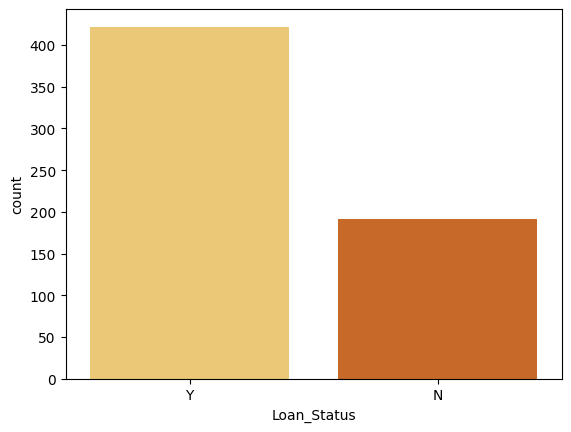

In [7]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [8]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [9]:
# Null Values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Data Preprocessing

In [10]:
# dropping useless column
df = df.drop(['Loan_ID'], axis = 1)

Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

<ipython-input-11-0ad3e736eae1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
<ipython-input-11-0ad3e736eae1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

In [14]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


# Data Normalization

In [15]:
# Square Root Transformation
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

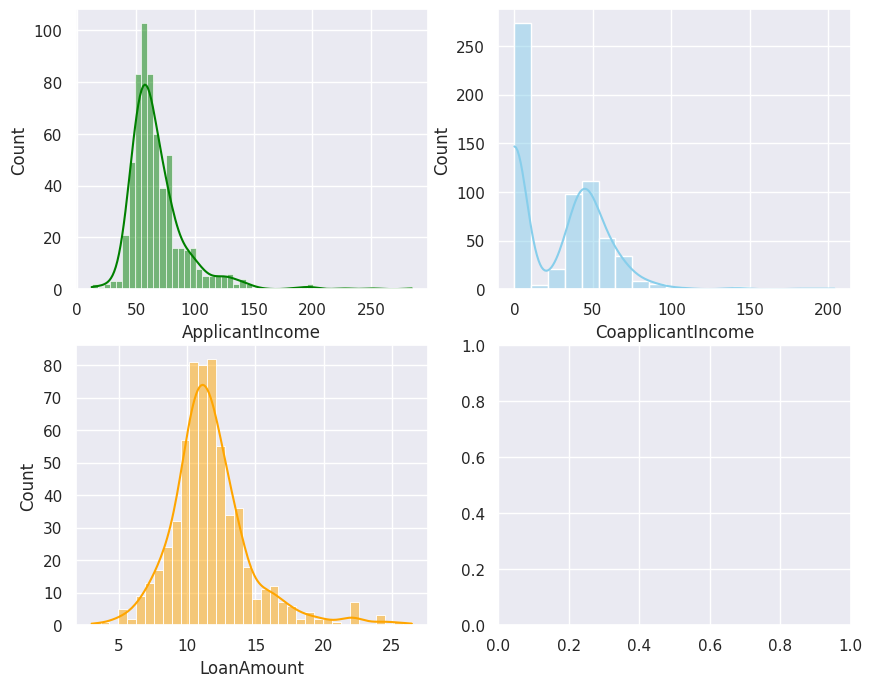

In [16]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [17]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

The number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [18]:
X, y = SMOTE().fit_resample(X, y)

In [19]:
# Conversion of labels to int values for ZK
y_int = y.astype(int)

In this section, data normalization will be performed to normalize the range of independent variables or features of data.

In [20]:
X = MinMaxScaler().fit_transform(X)

# Training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size = 0.2, random_state = 0)

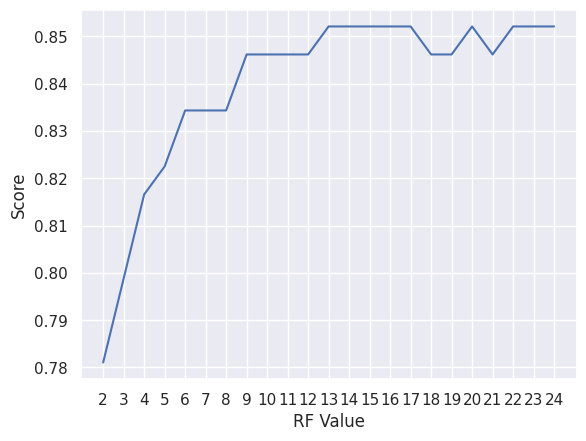

Random Forest Accuracy:  85.21%


In [22]:
from sklearn.ensemble import RandomForestClassifier
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [31]:
# LRclassifier = LogisticRegression(solver='liblinear', max_iter=500, random_state=1)
#  LRclassifier.fit(X_train, y_train)

# y_pred = LRclassifier.predict(X_test)

# # print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# LRAcc = accuracy_score(y_pred,y_test)
# print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81        86
           1       0.75      0.99      0.85        83

    accuracy                           0.83       169
   macro avg       0.87      0.84      0.83       169
weighted avg       0.87      0.83      0.83       169

[[59 27]
 [ 1 82]]
LR accuracy: 83.43%


# EZKL

In [23]:
try:
    # install ezkl
    import google.colab
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ezkl"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "onnx"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "hummingbird-ml"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "onnx-simplifier"])
# rely on local installation of ezkl if the notebook is not in colab
except:
    pass

import os
import torch
import ezkl
import json
from hummingbird.ml import convert

In [24]:
model_path = os.path.join('network.onnx')
compiled_model_path = os.path.join('network.compiled')
pk_path = os.path.join('test.pk')
vk_path = os.path.join('test.vk')
settings_path = os.path.join('settings.json')

witness_path = os.path.join('witness.json')
data_path = os.path.join('input.json')

# Convert Logistic Regression (doesn't work, skip this section)

In [32]:
# Weights of the model
weights_float = LRclassifier.coef_

# Quantization
scale_factor = 1000
weights_int = (weights_float * scale_factor).astype(np.int32)

# Modifying the weights
LRclassifier.coef_ = weights_int

print("Original Weigths (float):", weights_float)
print("Quantized Weights (int):", weights_int)

Original Weigths (float): [[ 0.30903251 -0.17418812 -0.23265714  0.1143514   3.78691097 -0.07775063
   0.46684778 -1.67342779 -1.740764   -1.27752735 -1.5345883   0.04190685
  -0.36170819 -2.67997756 -1.97089518 -2.5274467 ]]
Quantized Weights (int): [[  309  -174  -232   114  3786   -77   466 -1673 -1740 -1277 -1534    41
   -361 -2679 -1970 -2527]]


In [15]:
# Convert the model to the Pytorch format
circuit = convert(LRclassifier, "torch", X[:1]).model

NameError: name 'convert' is not defined

In [ ]:
# export to onnx format
# !!!!!!!!!!!!!!!!! This will flash a warning but it is fine !!!!!!!!!!!!!!!!!!!!!

# Input to the model
shape = X.shape[1:]
x = torch.rand(1, *shape, requires_grad=True)
torch_out = circuit(x)
# Export the model
torch.onnx.export(circuit,               # model being run
                  # model input (or a tuple for multiple inputs)
                  x,
                  # where to save the model (can be a file or file-like object)
                  "network.onnx",
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names=['input'],   # the model's input names
                  output_names=['output'],  # the model's output names
                  dynamic_axes={'input': {0: 'batch_size'},    # variable length axes
                                'output': {0: 'batch_size'}})

d = ((x).detach().numpy()).reshape([-1]).tolist()

data = dict(input_shapes=[shape],
            input_data=[d],
            output_data=[((o).detach().numpy()).reshape([-1]).tolist() for o in torch_out])

# Serialize data into file:
json.dump(data, open("input.json", 'w'))

In [ ]:
!RUST_LOG=trace
# TODO: Dictionary outputs
res = ezkl.gen_settings("network.onnx", settings_path)
assert res == True

# Convert Random Forest

In [25]:
torch_rf = convert(RFclassifier, "torch")

In [26]:
# !!!!!!!!!!!!!!!!! This cell will flash a warning about onnx runtime compat but it is fine !!!!!!!!!!!!!!!!!!!!!


# export to onnx format

# Input to the model
shape = X_train.shape[1:]
x = torch.rand(1, *shape, requires_grad=False)
torch_out = torch_rf.predict(x)
# Export the model
torch.onnx.export(torch_rf.model,               # model being run
                  # model input (or a tuple for multiple inputs)
                  x,
                  # where to save the model (can be a file or file-like object)
                  "network.onnx",
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=11,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names=['input'],   # the model's input names
                  output_names=['output'],  # the model's output names
                  dynamic_axes={'input': {0: 'batch_size'},    # variable length axes
                                'output': {0: 'batch_size'}})

d = ((x).detach().numpy()).reshape([-1]).tolist()

data = dict(input_shapes=[shape],
            input_data=[d],
            output_data=[o.reshape([-1]).tolist() for o in torch_out])

# Serialize data into file:
json.dump(data, open("input.json", 'w'))

In [27]:
run_args = ezkl.PyRunArgs()
# logrows
run_args.logrows = 20

res = ezkl.gen_settings(model_path, settings_path, py_run_args=run_args)
assert res == True

# Setup

In [30]:
cal_path = os.path.join("calibration.json")

# use the test set to calibrate the circuit
cal_data = dict(input_data = X_test.flatten().tolist())

# Serialize calibration data into file:
json.dump(data, open(cal_path, 'w'))

# Optimize for resources, we cap logrows at 12 to reduce setup and proving time, at the expense of accuracy
# You may want to increase the max logrows if accuracy is a concern
res = await ezkl.calibrate_settings(target = "resources", max_logrows = 12, scales = [2])


 <------------- Numerical Fidelity Report (input_scale: 2, param_scale: 2, scale_input_multiplier: 10) ------------->

+------------+--------------+-----------+-----------+----------------+------------------+---------------+---------------+--------------------+--------------------+------------------------+
| mean_error | median_error | max_error | min_error | mean_abs_error | median_abs_error | max_abs_error | min_abs_error | mean_squared_error | mean_percent_error | mean_abs_percent_error |
+------------+--------------+-----------+-----------+----------------+------------------+---------------+---------------+--------------------+--------------------+------------------------+
| 0.33333293 | 0.8642473    | 0.8642473 | 0         | 0.33333293     | 0.8642473        | 0.8642473     | 0             | 0.2551173          | 0.6666667          | 0.6666667              |
+------------+--------------+-----------+-----------+----------------+------------------+---------------+---------------+---

In [31]:
res = ezkl.compile_circuit(model_path, compiled_model_path, settings_path)
assert res == True

In [32]:
# srs path
res = await ezkl.get_srs( settings_path)

In [33]:
# now generate the witness file

res = await ezkl.gen_witness(data_path, compiled_model_path, witness_path)
assert os.path.isfile(witness_path)

In [ ]:
# HERE WE SETUP THE CIRCUIT PARAMS
# WE GOT KEYS
# WE GOT CIRCUIT PARAMETERS
# EVERYTHING ANYONE HAS EVER NEEDED FOR ZK

res = ezkl.setup(
        compiled_model_path,
        vk_path,
        pk_path,

    )

assert res == True
assert os.path.isfile(vk_path)
assert os.path.isfile(pk_path)
assert os.path.isfile(settings_path)

# Proof & Verify

In [ ]:
# GENERATE A PROOF


proof_path = os.path.join('test.pf')

res = ezkl.prove(
        witness_path,
        compiled_model_path,
        pk_path,
        proof_path,

        "single",
    )

print(res)
assert os.path.isfile(proof_path)

In [ ]:
# VERIFY IT

res = ezkl.verify(
        proof_path,
        settings_path,
        vk_path,

    )

assert res == True
print("verified")